In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/sme-invoicing-assistant


In [3]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/sme-invoicing-assistant/.env


True

In [4]:
import pandas as pd
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect("results/gpt-4o-gpt-4o/emails.db")
# conn = sqlite3.connect("src/data/db/llama3.2-vision_11b-qwen2.5_32b/emails.db")

# Write your SQL query
query = "SELECT * FROM emails"

# Read the query results into a pandas DataFrame
df = pd.read_sql(query, conn)

df.head(5)

,email_id,sender_email,recipient_email,subject,email_body,attachments,process_status,response,start_time,end_time,total_time,successful_requests,total_tokens,prompt_tokens,completion_tokens,total_cost
0,93185A89130149C0A842968E4AFDCAA2,RobinLevine@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 43925,Hi Tanya ! Please find attached payment screen...,transaction_1.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-22T02:27:52.875562,2025-01-22T02:28:02.693589,9.8180,8,2906,2599,307,0.0095675
1,614972488B7B411BAEA4814CF066CDAA,StevenNixon@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 51782,Hi Tanya ! Please find attached payment screen...,transaction_2.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-22T02:28:02.696606,2025-01-22T02:28:15.314340,12.6177,28,10034,8957,1077,0.0331625
2,C484ABEB38F44D29960B1CEF58510627,MadisonFord@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 42968,Hi Tanya ! Please find attached payment screen...,transaction_3.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-22T02:28:15.316510,2025-01-22T02:28:24.281095,8.9646,60,21377,19074,2303,0.070715
3,706B3403E8024178948B3BFBF9E64A25,KathrynJones@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 92948,Hi Tanya ! Please find attached payment screen...,transaction_4.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-22T02:28:24.283451,2025-01-22T02:28:35.575543,11.2921,104,37030,33006,4024,0.122755
4,86838440CA6C472AACFA3FCE1382609C,ChristineOwens@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice ID: 20304,Hi Tanya ! Please find attached payment screen...,transaction_5.jpeg,SUCCESS,"{""content"": ""DONE""}",2025-01-22T02:28:35.577048,2025-01-22T02:28:45.828714,10.2517,160,57002,50752,6250,0.18938


In [5]:
import json

json_file = "results/gpt-4o-gpt-4o/full_logs.json"

if "full_logs" in df.columns:
    last_completed = df[df["full_logs"] != ""].iloc[-1]
    full_logs = json.loads(last_completed["full_logs"])
    json.dump(full_logs, open(json_file, "w"), indent=4)
    conn.execute("ALTER TABLE emails DROP COLUMN full_logs")
    conn.execute("VACUUM")
    conn.commit()
    print("full_logs saved to", json_file)
else:
    full_logs = json.load(open(json_file))
    print("full_logs loaded from", json_file)

# Close the connection
conn.close()

full_logs loaded from results/gpt-4o-gpt-4o/full_logs.json


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   email_id             2000 non-null   object
 1   sender_email         2000 non-null   object
 2   recipient_email      2000 non-null   object
 3   subject              2000 non-null   object
 4   email_body           2000 non-null   object
 5   attachments          2000 non-null   object
 6   process_status       2000 non-null   object
 7   response             2000 non-null   object
 8   start_time           2000 non-null   object
 9   end_time             2000 non-null   object
 10  total_time           2000 non-null   object
 11  successful_requests  2000 non-null   object
 12  total_tokens         2000 non-null   object
 13  prompt_tokens        2000 non-null   object
 14  completion_tokens    2000 non-null   object
 15  total_cost           2000 non-null   object
dtypes: obj

In [7]:
df.describe()

,email_id,sender_email,recipient_email,subject,email_body,attachments,process_status,response,start_time,end_time,total_time,successful_requests,total_tokens,prompt_tokens,completion_tokens,total_cost
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,2000,1988,1,1947,2000,1001,3,528,2000,2000,1990,2000,2000,2000,2000,2000
top,93185A89130149C0A842968E4AFDCAA2,MichaelJones@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice I13212,Hi Tanya ! Please find attached payment screen...,,SUCCESS,"{""content"": ""DONE""}",2025-01-22T02:27:52.875562,2025-01-22T02:28:02.693589,9.4020,8,2906,2599,307,0.0095675
freq,1,3,2000,3,1,1000,1474,1462,1,1,2,1,1,1,1,1


In [8]:
# plot the distribution of categories
import matplotlib.pyplot as plt


def plot_value_distribution(df2, col="category", top_n=10):
    df2[col].value_counts()[:top_n].plot(kind="bar")
    plt.title(f"Distribution of {col}")

    # add the count on top of the bars
    for i in range(len(df2[col].value_counts()[:top_n])):
        count = df2[col].value_counts().values[i]
        plt.text(i, count, count, ha="center")

    plt.show()

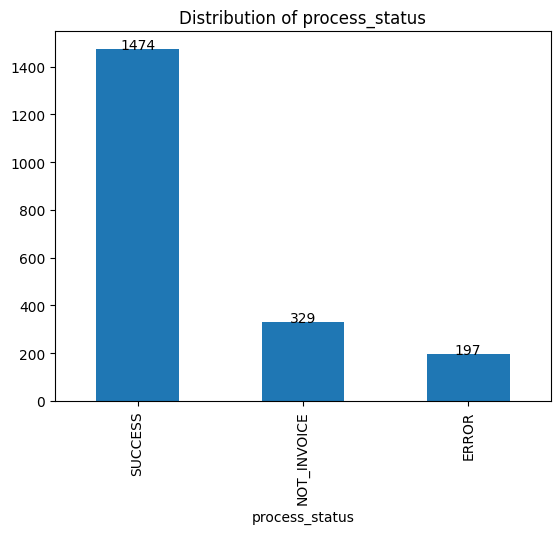

In [9]:
plot_value_distribution(df, "process_status")

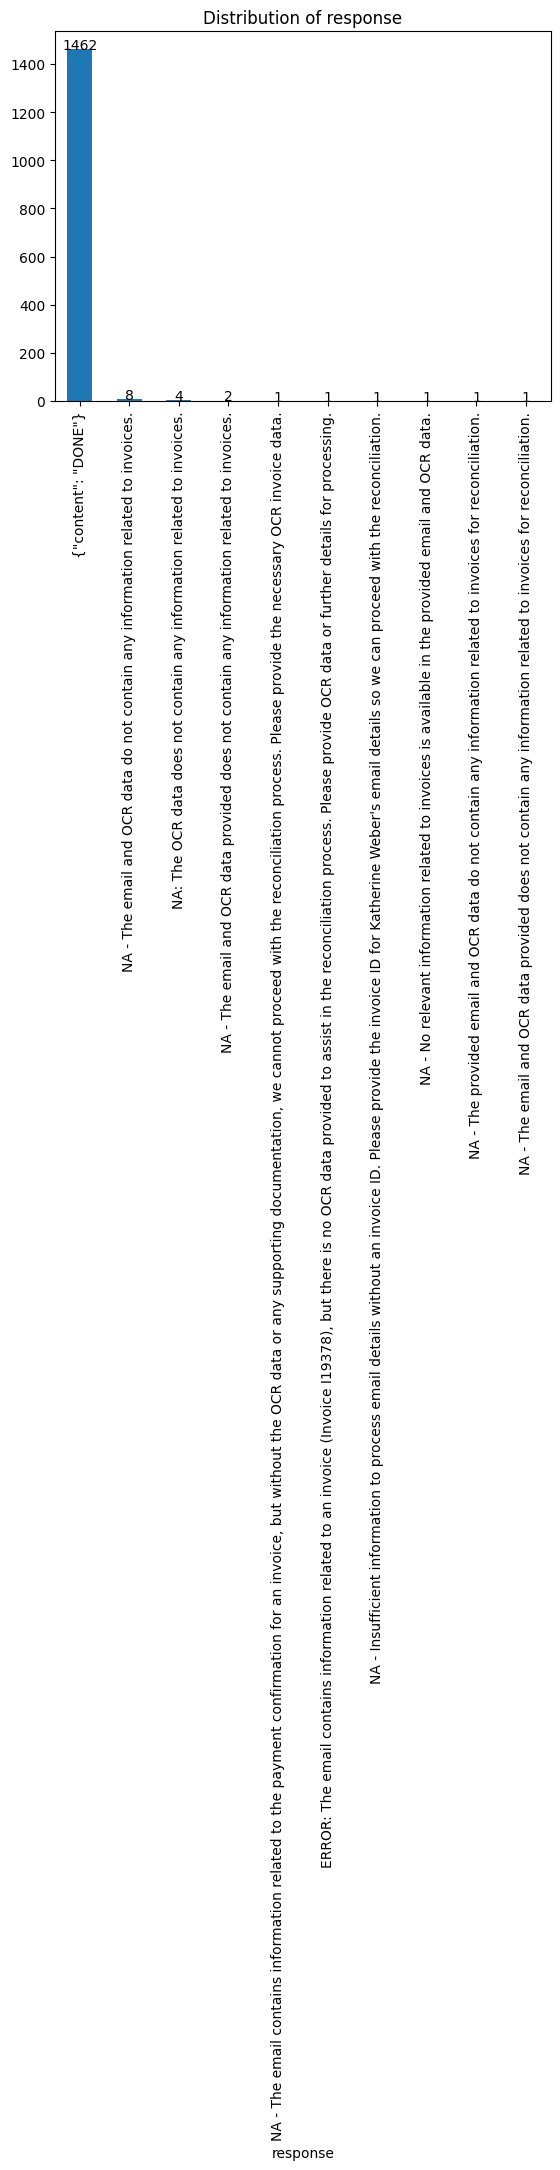

In [10]:
plot_value_distribution(df, "response")

In [11]:
df["end_time"] = pd.to_datetime(df["end_time"])
df["start_time"] = pd.to_datetime(df["start_time"])
df["duration"] = (df["end_time"] - df["start_time"]).dt.total_seconds()

In [12]:
df[["duration", "total_time"]].head()

,duration,total_time
0,9.818027,9.8180
1,12.617734,12.6177
2,8.964585,8.9646
3,11.292092,11.2921
4,10.251666,10.2517


<Axes: ylabel='Frequency'>

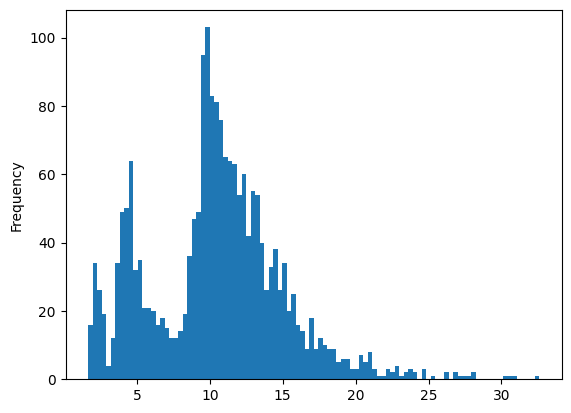

In [13]:
# plot the distribution of duration
df["duration"].plot(kind="hist", bins=100)

In [14]:
df[df["duration"] > 48]

,email_id,sender_email,recipient_email,subject,email_body,attachments,process_status,response,start_time,end_time,total_time,successful_requests,total_tokens,prompt_tokens,completion_tokens,total_cost,duration


In [15]:
df["duration"].describe()

count    2000.000000
mean       10.455226
std         4.605681
min         1.664090
25%         7.645513
50%        10.497075
75%        13.006521
max        32.580872
Name: duration, dtype: float64

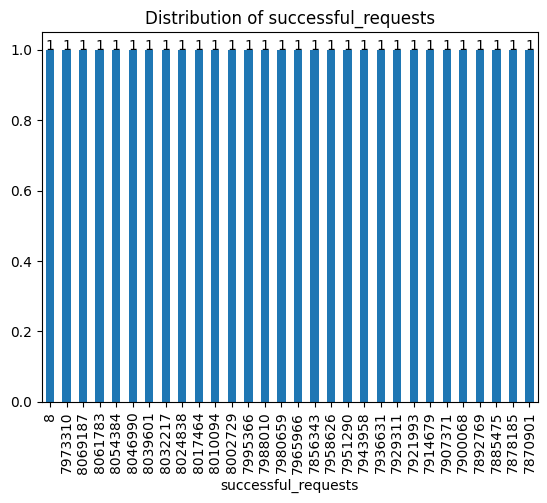

In [16]:
plot_value_distribution(df, "successful_requests", top_n=30)

In [17]:
df["process_status"].value_counts()

process_status
SUCCESS        1474
NOT_INVOICE     329
ERROR           197
Name: count, dtype: int64

In [18]:
success_rate = df["process_status"].value_counts()["SUCCESS"] / len(df)
success_rate

0.737

In [19]:
def total_power_in_watt(file_path):
    df = pd.read_csv(file_path)
    return df["CPU Package Power [W]"].mean() + df["GPU Power [W]"].mean()

In [20]:
power_idle = total_power_in_watt("results/power_idle2.csv")
power_idle

29.873

In [21]:
mean_response_time = df["duration"].mean()
mean_response_time

10.455226331

In [22]:
df.describe()

,start_time,end_time,duration
count,2000,2000,2000.000000
mean,2025-01-22 05:29:11.796349696,2025-01-22 05:29:22.251576064,10.455226
min,2025-01-22 02:27:52.875562,2025-01-22 02:28:02.693589,1.664090
25%,2025-01-22 04:01:15.704680192,2025-01-22 04:01:26.900114688,7.645513
50%,2025-01-22 05:33:43.335098880,2025-01-22 05:33:57.685530112,10.497075
75%,2025-01-22 06:57:07.970392320,2025-01-22 06:57:14.648642560,13.006521
max,2025-01-22 08:18:19.039584,2025-01-22 08:18:33.415099,32.580872
std,NaN,NaN,4.605681


In [23]:
row = df[df["process_status"] == "ERROR"].iloc[0]
row

email_id                                34AA7A59847C4141B526E83794125CAD
sender_email                                   RobinAnderson@example.com
recipient_email                             tanya.official.456@gmail.com
subject                       Payment Confirmation for Invoice ID: 21369
email_body             Hi Tanya ! Please find attached payment screen...
attachments                                          transaction_44.jpeg
process_status                                                     ERROR
response               ERROR: The invoice amount is missing from the ...
start_time                                    2025-01-22 02:36:14.313837
end_time                                      2025-01-22 02:36:19.433633
total_time                                                        5.1198
successful_requests                                                11655
total_tokens                                                     4180783
prompt_tokens                                      

In [24]:
full_logs[0]

{'name': 'input',
 'type': 'HumanMessage',
 'content': '\n                Help to reconcile invoices using the following email:\n\n                \n            Sender: RobinLevine@example.com\n            Subject: Payment Confirmation for Invoice ID: 43925\n            Body: Hi Tanya ! Please find attached payment screenshot for Invoice ID: 43925 , Regards Robin Levine\n            Attachment: transaction_1.jpeg\n            Time stamp: NOT_STARTED\n            \n                ',
 'timestamp': '2025-01-22T08:18:19.039584',
 'usage': {'input_tokens': 0,
  'output_tokens': 0,
  'total_tokens': 0,
  'input_token_details': {'audio': 0, 'cache_read': 0},
  'output_token_details': {'audio': 0, 'reasoning': 0}},
 'model_name': '',
 'additional_kwargs': {}}

In [25]:
for i, log in enumerate(full_logs):
    if row["attachments"] in log["content"]:
        print(i)
        break

383


In [26]:
full_logs[i : i + 5]

[{'name': 'input',
  'type': 'HumanMessage',
  'content': '\n                Help to reconcile invoices using the following email:\n\n                \n            Sender: RobinAnderson@example.com\n            Subject: Payment Confirmation for Invoice ID: 21369\n            Body: Hi Tanya ! Please find attached payment screenshot for Invoice ID: 21369 , Regards Robin Anderson\n            Attachment: transaction_44.jpeg\n            Time stamp: NOT_STARTED\n            \n                ',
  'timestamp': '2025-01-22T08:18:19.039584',
  'usage': {'input_tokens': 0,
   'output_tokens': 0,
   'total_tokens': 0,
   'input_token_details': {'audio': 0, 'cache_read': 0},
   'output_token_details': {'audio': 0, 'reasoning': 0}},
  'model_name': '',
  'additional_kwargs': {}},
 {'name': 'finance_clerk',
  'type': 'AIMessage',
  'content': 'Tool calls to ocr_tool',
  'timestamp': '2025-01-22T02:36:15.837547',
  'usage': {'input_tokens': 197,
   'output_tokens': 20,
   'total_tokens': 217,
   'i

In [32]:
from src.misc.metrics import *

get_metrics(df)

{'task_completion_rate': 1,
 'task_success_rate': 0.737,
 'mean_execution_time': 10.455226331}

In [28]:
len(df[df["attachments"] == ""]), len(df[df["attachments"] != ""])

(1000, 1000)

In [29]:
df_vision = df[df["attachments"] != ""].copy()
get_metrics(df_vision)

{'task_completion_rate': 1,
 'task_success_rate': 0.926,
 'mean_execution_time': 11.116701718}

In [30]:
df_no_vision = df[df["attachments"] == ""].copy()
get_metrics(df_no_vision)

{'task_completion_rate': 1,
 'task_success_rate': 0.548,
 'mean_execution_time': 9.793750944}

In [31]:
df_no_vision[df_no_vision["process_status"] != "SUCCESS"].head()

,email_id,sender_email,recipient_email,subject,email_body,attachments,process_status,response,start_time,end_time,total_time,successful_requests,total_tokens,prompt_tokens,completion_tokens,total_cost,duration,duration_hms
1003,2db38ad9-41f6-4671-93c2-7392b997027b,owhite@example.net,tanya.official.456@gmail.com,Payment Confirmation for Invoice I16676,Subject: Payment Confirmation for Invoice I166...,,NOT_INVOICE,NA: The email does not contain an OCR attachme...,2025-01-22 05:34:39.361343,2025-01-22 05:34:41.344049,1.9827,5826511,2090261164,1849563436,240697728,7030.88586999999,1.982706,0 days 00:00:01
1004,36fc024b-16f5-4be9-a9b0-7446edc730af,simonandrew@example.org,tanya.official.456@gmail.com,Payment Confirmation for Invoice I12240,Subject: Payment Confirmation for Invoice I122...,,ERROR,ERROR: Insufficient information to reconcile. ...,2025-01-22 05:34:41.398882,2025-01-22 05:34:45.188646,3.7898,5832341,2092355951,1851415883,240940068,7037.94038749999,3.789764,0 days 00:00:03
1006,a6a3fe38-eb0a-4dcf-82f6-dee89fda21a7,ricky23@example.org,tanya.official.456@gmail.com,Payment Confirmation for Invoice I11504,Subject: Payment Confirmation for Invoice I115...,,NOT_INVOICE,NA - The data provided does not contain any fu...,2025-01-22 05:34:53.752837,2025-01-22 05:34:57.517082,3.7642,5844015,2096551117,1855125905,241425212,7052.06688249999,3.764245,0 days 00:00:03
1007,b0bedcca-e69a-422e-9590-6107e61e1ae7,tylerswanson@example.net,tanya.official.456@gmail.com,Payment Confirmation for Invoice I14724,Subject: Payment Confirmation for Invoice I147...,,NOT_INVOICE,NA: The OCR data does not contain any informat...,2025-01-22 05:34:57.559716,2025-01-22 05:35:01.239868,3.6802,5849858,2098651065,1856983212,241667853,7059.13655999999,3.680152,0 days 00:00:03
1015,fe0393cc-2ac3-45b0-82b2-82c53fae83b3,christopher92@example.com,tanya.official.456@gmail.com,Payment Confirmation for Invoice I16640,Subject: Payment Confirmation for Invoice I166...,,NOT_INVOICE,NA - The email and OCR data do not contain any...,2025-01-22 05:36:39.992404,2025-01-22 05:36:43.580138,3.5877,5896785,2115535192,1871910855,243624337,7116.02050749999,3.587734,0 days 00:00:03


In [34]:
print_row_details(
    df_no_vision[df_no_vision["process_status"] != "SUCCESS"],
    columns=["process_status", "email_body", "response"],
)

--------------------------------------------------
process_status: NOT_INVOICE
--------------------------------------------------
email_body: Subject: Payment Confirmation for Invoice I16676
                Brandon Young <owhite@example.net>
                Mon, Jan 06, 2025, 06:59 AM
                Dear Tanya, I hope this message finds you well.I am writing to confirm that we have successfully made the payment for Invoice I16676, related to our recent order with you. Here are the details:  
                Description:
                Invoice Date: November 12, 2024
                Item: Wester Suit Women
                Quantity: 3
                Subtotal: $293.58
                Tax (10%): $29.36
                Shipping (if applicable): $18.08
                Total Amount paid: $341.02
                Transaction Reference Number - TXN-MST-156-799725
                Thank you and I look forward to our continued business
                Best regards,
                Brandon Young
